**Problem Statement**

What infrastructure and resources are required to support mass adoption of electronic vehicles(ev)?

The mass adoption of electric vehicles (EVs) requires significant infrastructure and resources to support their widespread use. Here are some key components necessary for facilitating the mass adoption of EVs:
1. Charging Infrastructure
2. Residential Charging
3. Fast Charging Networks
4. Grid Upgrades and Management
5. Battery Recycling and Disposal
6. Incentives and Policies
7. Education and Awareness


# Imports

In [1]:
# importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Fetching Datasets

In [6]:
# fetching dataset - 1
df1 = pd.read_csv('Ev_charger.csv')
df1.head()

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


In [11]:
# fetching dataset - 2
df2 = pd.read_csv('ev_charging_station_dataset.csv')
df2.head()

,State/UT No. of Retail Outlets (Ros) where EV Charging facility is available as on 1.1.2022,Unnamed: 1
0,State/UT,EV Charging Facility
1,Andhra Pradesh,65
2,Arunachal Pradesh,4
3,Assam,19
4,Bihar,26


# Exploratory Data Analysis (EDA)


Analysing the datasets

In [12]:
# checking the shape (# of rows and columns) of the datasets
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)


DF1 Shape:  (24, 6)
DF2 Shape:  (32, 2)


In [13]:
# checking the info (columns, datatypes, nulls) of the datasets
print(' <<< DATASET 1 -----------------------------------------------------------')
print(df1.info())
print(' <<< DATASET 2 -----------------------------------------------------------')
print(df2.info())

 <<< DATASET 1 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    24 non-null     object
 1   2W        24 non-null     int64 
 2   3W        24 non-null     int64 
 3   4W        24 non-null     int64 
 4   Bus       24 non-null     int64 
 5   Chargers  24 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.2+ KB
None
 <<< DATASET 2 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   State/UT No. of Retail Outlets (Ros) whe

In [14]:
# getting a statistical summary of the datasets
d1 = df1.describe()
d2 = df2.describe()
display('<<< DATASET 1 >>>', d1, '<<< DATASET 2 >>>', d2)

'<<< DATASET 1 >>>'

,2W,3W,4W,Bus,Chargers
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,8421.458333,3853.166667,334.041667,28.500000,106.791667
std,10942.261145,8850.690961,476.930628,63.771331,96.623869
min,187.000000,234.000000,12.000000,0.000000,10.000000
25%,848.000000,512.750000,34.750000,0.000000,25.000000
50%,2967.500000,931.000000,129.000000,0.000000,67.500000
75%,10697.750000,2659.250000,434.000000,5.500000,180.250000
max,38558.000000,42881.000000,1895.000000,197.000000,317.000000


'<<< DATASET 2 >>>'

,State/UT No. of Retail Outlets (Ros) where EV Charging facility is available as on 1.1.2022,Unnamed: 1
count,32,32
unique,32,26
top,State/UT,2
freq,1,3


# **Analysis of charging stations sanctioned**


Observation: Maharashtra, Gujarat, Karnataka, Kerala, Uttar Pradesh, Rajasthan, and Andhra Pradhesh are among the top states with the majority of EV charging stations sanctioned while the remaining states have less number of the same.

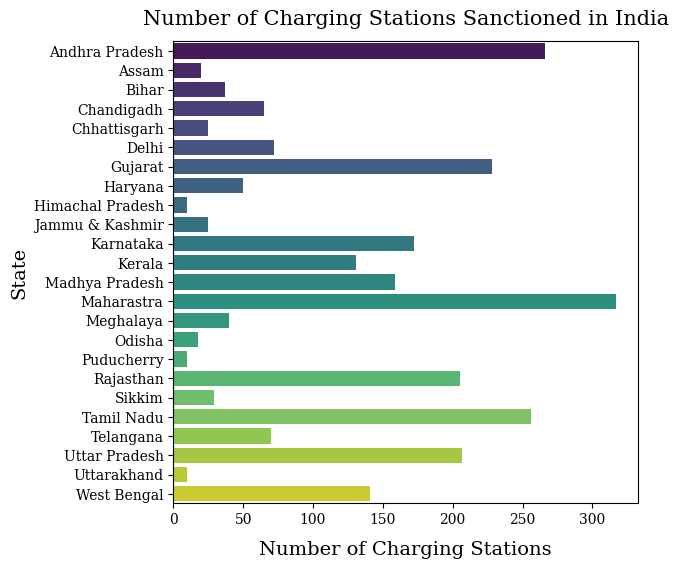

In [15]:
# charging stations sanctioned visualization from dataset 1
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='Chargers', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of Charging Stations', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Number of Charging Stations Sanctioned in India', weight=200, family='serif', size=15, pad=12)
plt.show()

# Model Building Using K-Means Clusteing




In [25]:
# selecting features for building a model
X = df1[['2W','3W','4W','Bus','Chargers']]

In [26]:
# applying Principle Component Analysis (PCA)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-2871.508416,38948.895228,-98.664791,14.454221,-8.945186
1,30314.139840,383.369954,620.150232,23.071996,-12.232459
2,24631.714359,-578.984401,-505.128095,-104.928024,-13.789448
3,17491.462954,-1542.709460,-445.053796,32.310197,15.581315
4,14245.522927,-2044.607724,-340.025157,26.923981,-5.429320


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

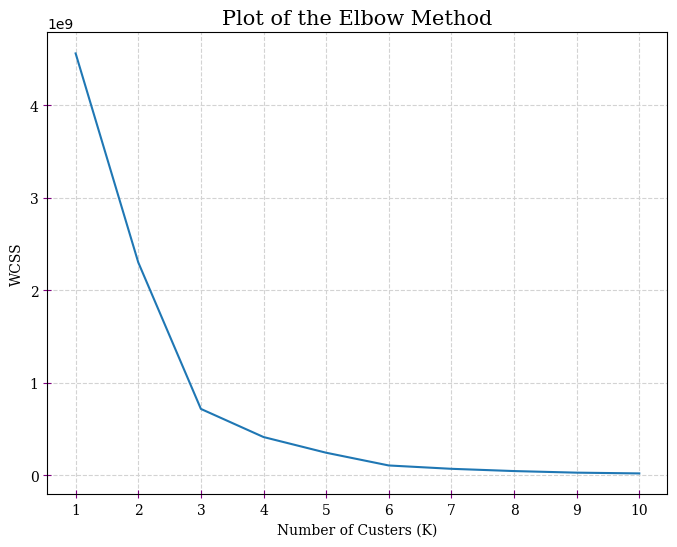

In [27]:
# plotting the results of Elbow

wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [28]:
# training the model using k=4 as rendered by the above plot
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=90)

In [29]:
# check the labels assigned to each data point
print(kmean.labels_)

[2 1 1 1 1 3 0 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [30]:
# check the size of clusters
pd.Series(kmean.labels_).value_counts()

0    15
1     4
3     4
2     1
dtype: int64

In [32]:
# adding a new feature of cluster labels to the dataset 1
df1['clusters'] = kmean.labels_

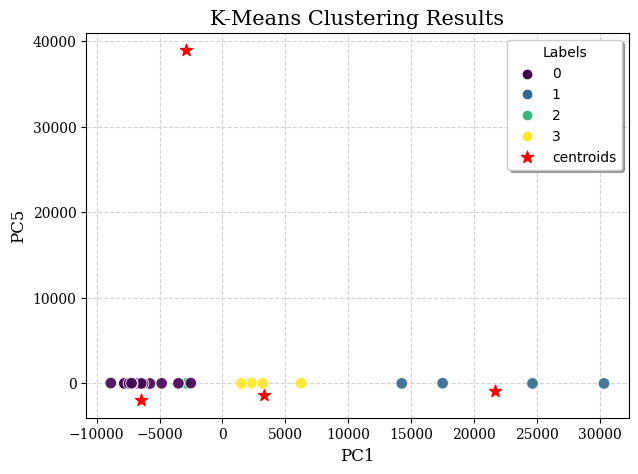

In [33]:
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC5', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC5', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()